In [37]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

In [31]:
class LogisticRegression:
    def __init__(self, lr = 0.001, n_iter = 1000):
        self.lr  = lr
        self.n_iter = n_iter
        
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples , n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient
        for e in range(self.n_iter):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear)
            
            #compute gradient
            #loss(Cross entropy) = y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) # dloss/dy_pred * dy_pred/dlinear * dlinear/dw 
            db = (1/n_samples) * np.sum(y_pred - y)
            
            #update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        y_pred_reg = self._sigmoid(linear)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred_reg]
        
        return y_pred_class
        
        
        
        
        

In [ ]:
def 

In [9]:
X, y = datasets.make_classification(n_samples = 200, n_features = 10, n_classes = 2, random_state=42)
print(f"{X.shape}, {y.shape}")

(200, 10), (200,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

In [38]:
y_pred = model.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

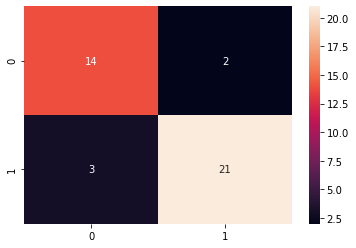

In [42]:
sns.heatmap(cm, annot = True)